Importing Dependecies

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Data collection and Processing

In [2]:
#loading the data from csv file to pandas dataframe
dataset = pd.read_csv(r'D:\VS Code files\ML\Car Price\Car-Price-Prediction\car_details.csv')

In [3]:
#inspecting the first 5 rows of the df
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
#checking no. of rows and columns
dataset.shape

(4340, 8)

In [6]:
#getting some info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
#checking no. of missing values
dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
#checking the distribution of categorial data
print(dataset.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [9]:
print(dataset.seller_type.value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [10]:
print(dataset.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [12]:
print(dataset.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorial Data

converting the object cols to int cols

In [16]:
# encoding 'fuel' column
dataset.replace({'fuel':{'Diesel':0, 'Petrol':1, 'CNG':2, 'LPG' : 3, 'Electric':4}},inplace=True)

# encoding 'seller' column
dataset.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)

# encoding 'transmission' column
dataset.replace({'transmission':{'Manual':0, 'Automatic':1}},inplace=True)

# encoding 'Owner' column
dataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner' : 3, 'Test Drive Car':4}},inplace=True)

C:\Users\samad\AppData\Local\Temp\ipykernel_11200\1495180905.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'seller_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)
C:\Users\samad\AppData\Local\Temp\ipykernel_11200\1495180905.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({'owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner' : 3, 'Test Drive Car':4}},inplace=True)


In [17]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   int64 
 5   seller_type    4340 non-null   int64 
 6   transmission   4340 non-null   int64 
 7   owner          4340 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 271.4+ KB


Splitting the data into training and test data

X stores features (remove sp and name from here)
Y is target -> S.P.

In [23]:
X = dataset.drop(['name','selling_price'],axis=1) #1 for column, 0 for row
Y = dataset['selling_price']

In [24]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [25]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [205]:
#train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.1,random_state=2 )


In [206]:
print(X_train.shape, X_test.shape)

(3906, 6) (434, 6)


Feature Scaling / Standardization

In [207]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
print(X_train.std())

0.9999999999999959


In [209]:
print(X_test.std())

1.0098971952963713


In [199]:
#scaler = StandardScaler()

In [200]:
#scaler.fit(X_train)

In [201]:
#X_train_standardised = scaler.transform(X_train)
#print(X_train_standardised)

In [202]:
#X_test_standardised = scaler.transform(X_test)

In [203]:
#print(X_train_standardised.std())

In [204]:
#print(X_test_standardised.std())

Model Training

1. Linear Regression

In [210]:
# loading the linear regression model
lin_reg_model = LinearRegression()


In [212]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [213]:
#predicting on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [214]:
# R squared error on training data, linear reg
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.4430787587921937


Visualizing the actual and predicted prices

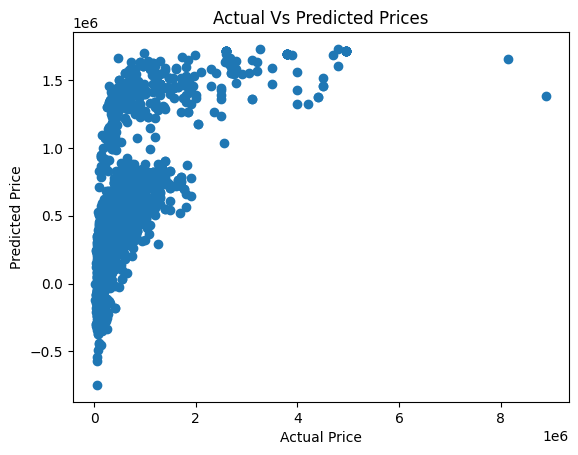

In [215]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

the values are very close to each other which shows its a good prediction.

In [216]:
#predicting on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [217]:
# R squared error on testing data, linear reg
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)


R squared Error :  0.5212912933220205


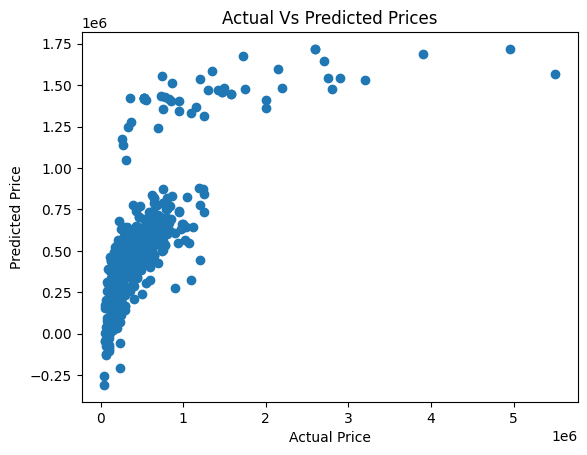

In [218]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

2. Lasso Regression

In [246]:
# loading the lasso regression model
lass_reg_model = Lasso(alpha=10)

In [247]:
lass_reg_model.fit(X_train, Y_train)

Lasso(alpha=10)

Model Evaluation

In [248]:
#predicting on training data
training_data_predict = lass_reg_model.predict(X_train)

In [249]:
# R squared error
error_score_1= metrics.r2_score(Y_train, training_data_predict)
print("R squared Error : ", error_score_1)

R squared Error :  0.4430787576457781


Visualizing the actual and predicted prices

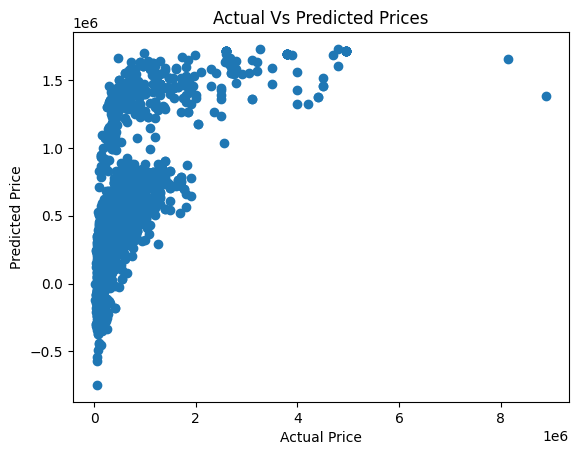

In [250]:
plt.scatter(Y_train, training_data_predict)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

In [251]:
#predicting on test data
test_data_predict = lass_reg_model.predict(X_test)
# R squared error
error_score_2 = metrics.r2_score(Y_test, test_data_predict)
print("R squared Error : ", error_score_2)

R squared Error :  0.5212885175053706


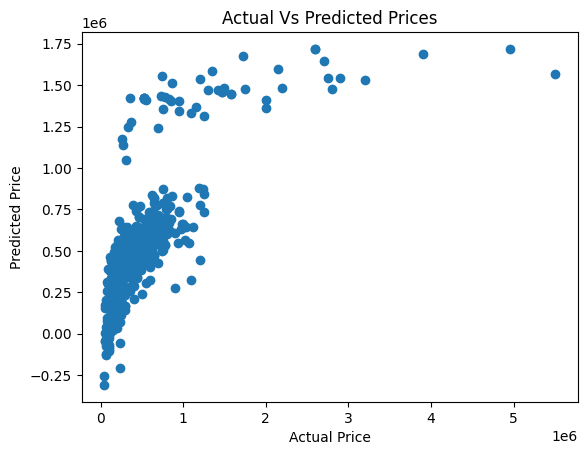

In [252]:
plt.scatter(Y_test, test_data_predict)
plt.xlabel ("Actual Price")
plt.ylabel( "Predicted Price")
plt.title( "Actual Vs Predicted Prices")
plt.show()

In [254]:
print("Linear Regression coefficients:", lin_reg_model.coef_)
print("Lasso Regression coefficients:", lass_reg_model.coef_)


Linear Regression coefficients: [ 160658.61411788  -35283.47317701 -130918.11183363   43686.86176491
  259177.75259805   -7289.91446573]
Lasso Regression coefficients: [ 160662.57106922  -35272.54221425 -130905.58221317   43682.24657237
  259170.85341924   -7282.99472641]
